# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
    df.to_csv('pca-dataset.csv', index=False)
    
generate_data()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('pca-dataset.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [4]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

In [5]:
# insert code here
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
X_train_std1 = sc1.fit_transform(X_train)
X_test_std1  = sc1.transform(X_test)

In [6]:
import numpy as np

covariance_mat = np.cov(X_train_std1.T)
print(covariance_mat.round(1))

[[ 1.  -0.1  0.1  0.  -0.2 -0.1  0.1  0.  -0.1 -0.  -0.   0.1 -0.3  0.5
   0.5 -0.4 -0.3  0.   0.2  0.3]
 [-0.1  1.   0.   0.1  0.1  1.  -0.  -0.   0.   0.1 -0.   0.   0.4  0.1
  -0.6  0.   0.  -0.  -0.3  0.1]
 [ 0.1  0.   1.   0.1 -0.1  0.   0.  -0.  -0.   0.1 -0.  -0.   0.3 -0.2
   0.3 -0.   0.2  0.  -0.1  0.1]
 [ 0.   0.1  0.1  1.   0.1  0.1 -0.   0.   0.  -0.1  0.   0.  -0.1  0.6
   0.1  0.8 -0.1 -0.  -0.2  0. ]
 [-0.2  0.1 -0.1  0.1  1.   0.1  0.   0.   0.1  0.1 -0.  -0.   0.7  0.
   0.3 -0.1  0.3 -0.1 -0.6 -0.2]
 [-0.1  1.   0.   0.1  0.1  1.  -0.  -0.   0.   0.1 -0.   0.   0.4  0.1
  -0.6  0.   0.  -0.  -0.3  0.1]
 [ 0.1 -0.   0.  -0.   0.  -0.   1.   0.  -0.   0.  -0.   0.  -0.   0.
   0.  -0.1 -0.   0.   0.  -0. ]
 [ 0.  -0.  -0.   0.   0.  -0.   0.   1.   0.1  0.  -0.   0.  -0.   0.1
   0.1  0.  -0.  -0.   0.   0. ]
 [-0.1  0.  -0.   0.   0.1  0.  -0.   0.1  1.   0.   0.   0.   0.1 -0.
  -0.   0.   0.1 -0.  -0.1 -0. ]
 [-0.   0.1  0.1 -0.1  0.1  0.1  0.   0.   0.   1.  -0.  -

C:\Users\Somani Bhanu Sri\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


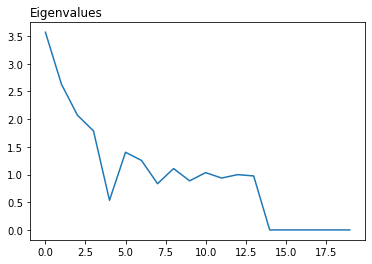

In [7]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_mat)

plt.plot(eigen_values)
plt.title('Eigenvalues', loc='left')
plt.show()

C:\Users\Somani Bhanu Sri\anaconda3\lib\site-packages\matplotlib\transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
C:\Users\Somani Bhanu Sri\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Somani Bhanu Sri\anaconda3\lib\site-packages\matplotlib\transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


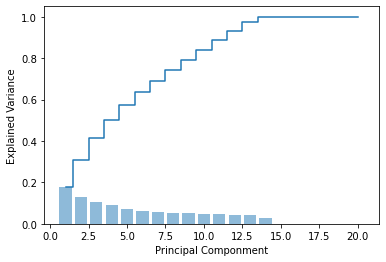

In [8]:
tot1 = sum(eigen_values)

variance_exp = [(i / tot1) for i in sorted(eigen_values, reverse=True)]
cum_var_exp = np.cumsum(variance_exp)

plt.bar(range(1,21), variance_exp, alpha=0.5, align='center', label='Variance Explained')
plt.step(range(1,21), cum_var_exp, where='mid', label='Cumulative Explained')
plt.xlabel('Principal Componment')
plt.ylabel('Explained Variance')
plt.show()

In [9]:

eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [10]:
w1 = np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:, np.newaxis]))

print(w1)

[[-0.26701899+0.j  0.10485455+0.j]
 [ 0.23305758+0.j -0.48675784+0.j]
 [ 0.08166629+0.j  0.15758674+0.j]
 [-0.06337889+0.j -0.23123453+0.j]
 [ 0.29210683+0.j  0.10348747+0.j]
 [ 0.23305758+0.j -0.48675784+0.j]
 [-0.01521638+0.j  0.03976582+0.j]
 [-0.02585149+0.j  0.02164061+0.j]
 [ 0.05326281+0.j -0.01156534+0.j]
 [-0.09542662+0.j  0.00743504+0.j]
 [ 0.00324787+0.j  0.00728039+0.j]
 [-0.00379979+0.j -0.01937691+0.j]
 [ 0.47231125+0.j  0.05646224+0.j]
 [-0.33954551+0.j -0.2627521 +0.j]
 [-0.07351651+0.j  0.48199352+0.j]
 [-0.04694629+0.j -0.24315463+0.j]
 [ 0.39589851+0.j  0.23963267+0.j]
 [-0.03368577+0.j -0.00973168+0.j]
 [-0.44070824+0.j -0.01666442+0.j]
 [-0.11452823+0.j -0.0446603 +0.j]]


C:\Users\Somani Bhanu Sri\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


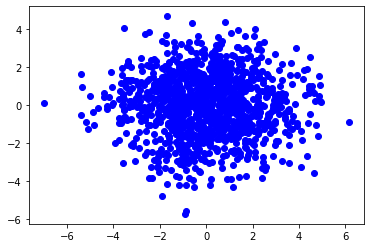

In [11]:
X_train_pca1 = X_train_std1.dot(w1)

plt.plot(X_train_pca1[:,0], X_train_pca1[:,1], 'bo')
plt.show()

We will apply principal component analysis (PCA) and assess the explained variance ratio to establish the optimal number of components to decrease the data. Understanding the number of primary components that preserve the majority of the data from the original dataset will be made easier with the use of this technique.

We'll carry out the subsequent actions:

enlarge the data
Do the covariance matrix calculation.
Calculate the covariance matrix's eigenvalues and eigenvectors.
Select the top k eigenvectors after descendingly sorting the eigenvalues.
Data projection onto the new subspace

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

In [12]:
# Insert code here
df['target']

0       0.0
1       2.0
2       0.0
3       1.0
4       0.0
       ... 
1495    0.0
1496    0.0
1497    2.0
1498    0.0
1499    2.0
Name: target, Length: 1500, dtype: float64

In [13]:
df['target'].unique()

array([0., 2., 1.])

In [14]:
df['target'].value_counts()

0.0    744
2.0    380
1.0    376
Name: target, dtype: int64

The percentage of cases that were properly categorised within the dataset is known as accuracy. When the target variable's classes are balanced, that is, when they have nearly the same number of instances, the measure is beneficial.

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [15]:
# Insert code here 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model1 = LogisticRegression(random_state=40)
model1.fit(X_train, y_training)

LogisticRegression(random_state=40)

In [16]:
y_pred1 = model1.predict(X_test)


accuracy1 = accuracy_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1, average='weighted')
recall1 = recall_score(y_test, y_pred1, average='weighted')
f1 = f1_score(y_test, y_pred1,average='weighted')

print(f'Accuracy: {accuracy1:.4f}')
print(f'Precision: {precision1:.4f}')
print(f'Recall: {recall1:.4f}')

Accuracy: 0.7033
Precision: 0.7040
Recall: 0.7033


Without using PCA we got accuracy as :70, precision as : 70 and recall as 70 too.

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [17]:
# Insert code
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

p2 = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA()),
              ('model', LogisticRegression())
             ])

parameters = {'model__C': [0.01, 0.1, 1, 10], 'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16]}

gs1 = GridSearchCV(p2, param_grid=parameters, scoring='accuracy', cv=10, refit=True)
gs = gs1.fit(X_train, y_training)

gs.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=13)),
                ('model', LogisticRegression(C=10))])

In [18]:
Y_pred_gs = gs.predict(X_test)

In [19]:
score1 = gs.score(X_test,y_test)
print(score1)

0.71


In [20]:
model2 = gs.best_estimator_

In [21]:
# evaluate the model
accuracy2 = accuracy_score(y_test, Y_pred_gs)
precision2 = precision_score(y_test, Y_pred_gs, average='weighted')
recall2 = recall_score(y_test, Y_pred_gs, average='weighted')
f1 = f1_score(y_test, y_pred1,average='weighted')

print(f'Accuracy: {accuracy2:.4f}')
print(f'Precision: {precision2:.4f}')
print(f'Recall: {recall2:.4f}')

Accuracy: 0.7100
Precision: 0.7091
Recall: 0.7100


This model slightly performed well than the previous model.

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [22]:
# Insert code here
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(random_state = 40)
dt1.fit(X_train, y_training)
y_pred2 = dt1.predict(X_test)
    
# Compute evaluation metrics
accuracy3 = accuracy_score(y_test, y_pred2)
precision3 = precision_score(y_test, y_pred2, average='weighted')
recall3 = recall_score(y_test, y_pred2, average='weighted')
f1 = f1_score(y_test, y_pred2,average='weighted')
print("Accuracy", accuracy3)
print("Precision", precision3)
print("F1 Score ", f1)

#criterion='entropy', random_state=123, max_depth=3

Accuracy 0.6666666666666666
Precision 0.6847588257153473
F1 Score  0.6713101553242196


Compared to the logistic regression model, Decision tree model has less accuracy.

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [23]:
# Insert code here
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

p3 = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA()),
              ('model', DecisionTreeClassifier(random_state=123))
             ])

parameters3 = {'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16], 'model__max_depth': [3, 4, 5, 6, 7, 8],
              'model__criterion': ['gini', 'entropy']}
1
gs2 = GridSearchCV(p3, param_grid=parameters3, scoring='accuracy', cv=10, refit=True)
gs2 = gs.fit(X_train, y_training)

gs2.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=13)),
                ('model', LogisticRegression(C=10))])

In [24]:
Y_pred_gs = gs2.predict(X_test)

In [25]:
score1 = gs2.score(X_test,y_test)
print(score1)

0.71


In [26]:
# evaluate the model
accuracy4 = accuracy_score(y_test, Y_pred_gs)
precision4 = precision_score(y_test, Y_pred_gs, average='weighted')
recall4 = recall_score(y_test, Y_pred_gs, average='weighted')
f1 = f1_score(y_test, y_pred2,average='weighted')

print(f'Accuracy: {accuracy4:.4f}')
print(f'Precision: {precision4:.4f}')
print(f'Recall: {recall4:.4f}')

Accuracy: 0.7100
Precision: 0.7091
Recall: 0.7100


Finally, The decision tree with PCA performs better than logistic regression models.